### Project and data are based on a free, online course of machine learning https://www.coursera.org/learn/machine-learning. I wholeheartedly recommend this! 

## I will show how do it in Python:
    + apply SVM (support vector machine),
    + plot decision boundary for SVM.

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
from mpl_toolkits import mplot3d
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from scipy.optimize import minimize
import scipy.io
import math
from sklearn.svm import SVC
import warnings
import sys


# ignore warnings
warnings.filterwarnings('ignore')

# write packages and python version to file
'''
! python -m pip list > packages_versions.txt
# a append to file
with open('packages_versions.txt', 'a') as f:
    f.write('Python version ' + str(sys.version))
''';

In [2]:
def plot_2types(X1, X2, Y, l1, l2, lab1, lab2, leg_pos='lower left'):
    X1_neg, X2_neg = [], []
    X1_pos, X2_pos = [], []
    for x1, x2, y in zip(X1, X2, Y):
        if y == 1:
            X1_pos.append(x1)
            X2_pos.append(x2)
        else:
            X1_neg.append(x1)
            X2_neg.append(x2)
    fig = plt.figure(figsize=(10,10)) 
    ax = fig.gca() # get current axis
    ax.scatter(X1_pos,X2_pos, color = 'r', label = l1)
    ax.scatter(X1_neg,X2_neg, color = 'b', label = l2)
    ax.set_xlabel(lab1, fontsize=18)
    ax.set_ylabel(lab2, fontsize=18)
    ax.legend(prop={'size': 20}, loc = leg_pos)
    return ax

def plot_svc_decision_function(model, ax , C = 1):
    '''
    Plots svc decision boundary, using contour with levels = [0].
    '''
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    x1 = np.linspace(xlim[0], xlim[1], 30)
    x2 = np.linspace(ylim[0], ylim[1], 30)
    X1, X2 = np.meshgrid(x1, x2)
    x1x2 = np.vstack([X1.flatten(), X2.flatten()]).T
 
    P = model.decision_function(x1x2).reshape(X1.shape)
    temp = ax.contour(X1, X2, P, colors='green', levels=[0])
    ax.clabel(temp, [0], fmt = {0: 'C={}'.format(C)}, fontsize=15)
    return ax

def fit_C_sigma(X, Y, X_val, Y_val):
    '''
    Finds values C and sigma, which imply the lowest prediction error.
    '''
    values = [ 0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]
    C_min = None
    sigma_min = None
    error = math.inf

    for sigma in values:
        gamma = 1/(2 * sigma ** 2)
        for C in values:
            model = SVC(kernel='rbf', C=C, gamma=gamma)
            model.fit(X, Y)
            predictions = model.predict(X_val)
            prediction_error = np.mean(predictions != Y_val)
            if prediction_error < error:
                error = prediction_error
                sigma_min = sigma
                C_min = C
    return C_min, sigma_min


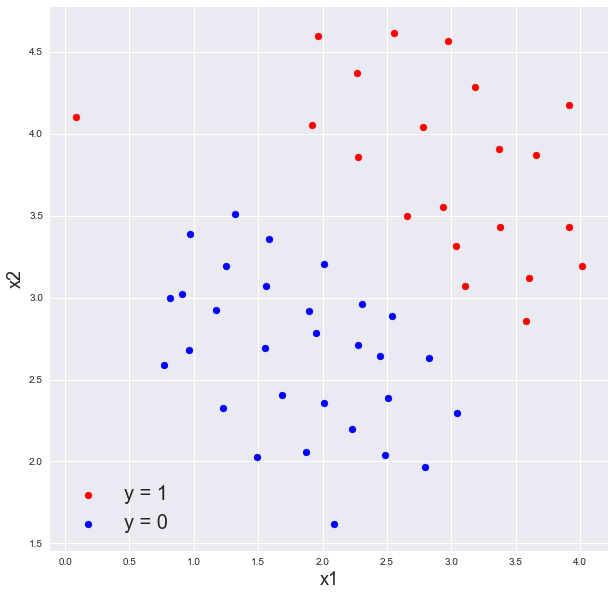

In [3]:
# Load some data and plot them
data = scipy.io.loadmat('ex6data1.mat')
X = data['X']
Y = data['y'].flatten()
ax1 = plot_2types(X[:,0], X[:,1], Y, 'y = 1', 'y = 0', 'x1', 'x2')

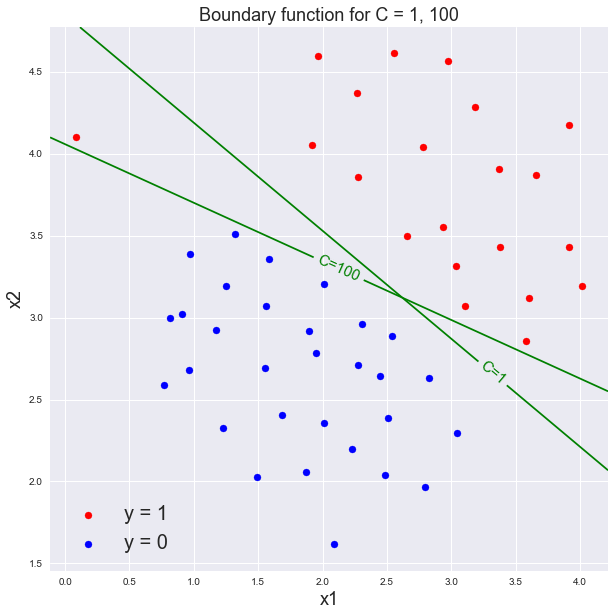

In [4]:
for C in (1, 100):
    model = SVC(kernel='linear', C=C)
    model.fit(X, Y)
    ax1 = plot_svc_decision_function(model, ax1, C=C)

ax1.set_title('Boundary function for C = 1, 100', size = 18)
ax1.figure

In [5]:
data2 = scipy.io.loadmat('ex6data2.mat');
X1 = data2['X']
Y1 = data2['y'].flatten()
C = 1; sigma = 0.1
gamma = 1/(2 * sigma ** 2)

# rbf mean gaussian kernel, when gamma = 1/(2 * sigma ** 2)
model = SVC(kernel='rbf', C=C, gamma=gamma)
model.fit(X1, Y1);


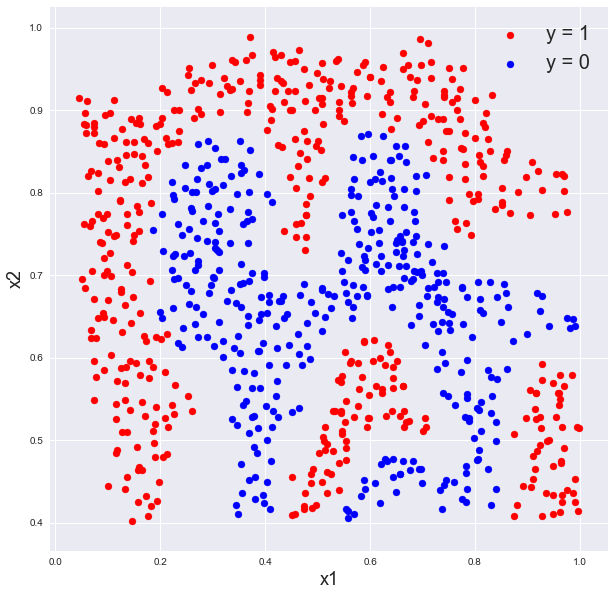

In [6]:
ax2 = plot_2types(X1[:,0], X1[:,1], Y1, 'y = 1', 'y = 0', 'x1', 'x2', 'upper right')

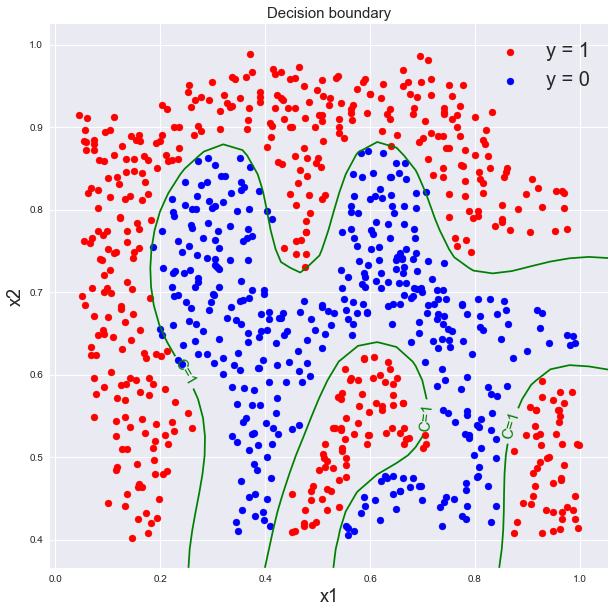

In [7]:
ax2 = plot_svc_decision_function(model, ax2 , C = C)
ax2.set_title('Decision boundary', size = 15)
ax2.figure

In [8]:
data3 = scipy.io.loadmat('ex6data3.mat')

In [9]:
X3 = data3['X']
Y3 = data3['y'].flatten()
X3_val = data3['Xval']
Y3_val = data3['yval'].flatten()

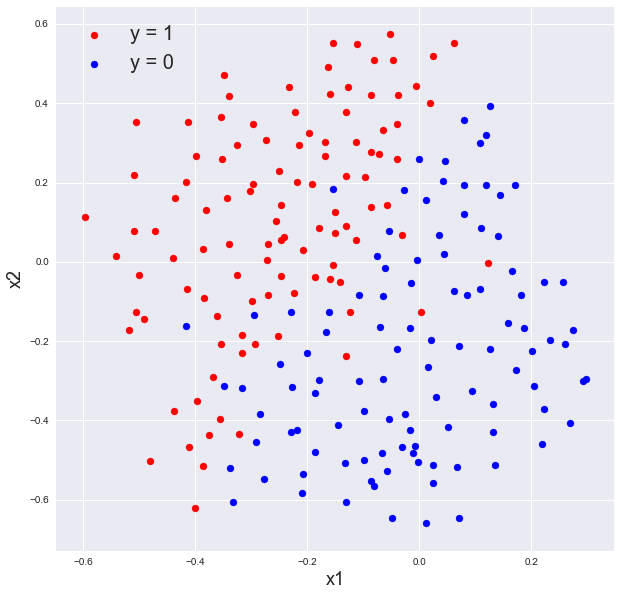

In [10]:
ax3 = plot_2types(X3[:,0], X3[:,1], Y3, 'y = 1', 'y = 0', 'x1', 'x2', leg_pos='upper left')

In [11]:
# Find the most optimal C and sigma
C_min, sigma_min = fit_C_sigma(X3, Y3, X3_val, Y3_val)
gamma_min = 1/(2 * sigma_min ** 2)
model = SVC(kernel='rbf', C=C_min, gamma=gamma_min)
model.fit(X3, Y3);

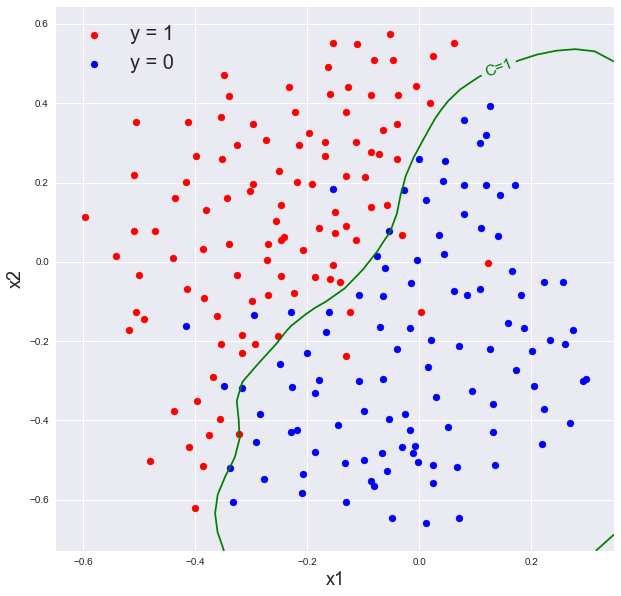

In [12]:
ax3 = plot_svc_decision_function(model, ax3 , C = C_min)
ax3.figure